# Linear Regression

**Linear Regression** is a supervised learning algorithm that can be used to model a dependant variable *y*, as a function of independant variables (or 'features'), *x* . 

It does this by creating a 'line of best fit' for the data.

With only one *x*, the formula is as simple as the slope of a line:

$\hat{y} = mx + b$

Like with other statistical tests, you can evaluate whether or not a simple linear regression model is statistically significant using p-values.

In addition to questions of statistical significance, we can also measure regression model performance in terms of goodness of fit and error.


## What needs to be true for Linear Regression Models to be a good choice?

### **Key Assumptions**

#### **Linearity:**

The relationship between the dependent and independent variables should be linear.  
**One of the ways to test this is a Visual Inspection:** 

- Create scatter plots of the residuals against the predicted values.   
- If the points appear to follow a straight line, the assumption of linearity is likely met.

  **Statistical Tests:**   
- We can also use the Breusch-Pagan test or the Koenker-Bassett test to formally test for linearity.


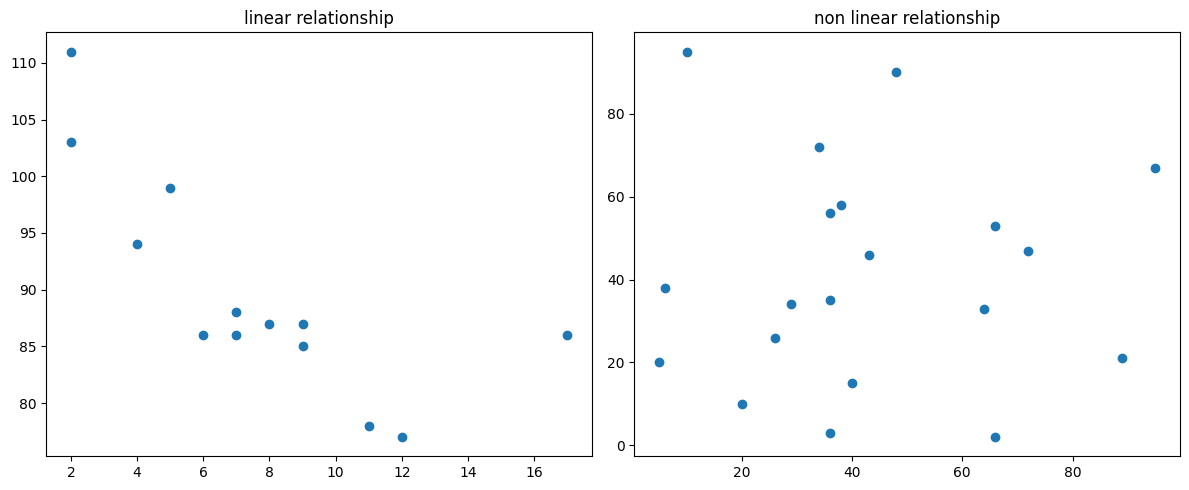

In [37]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

x2 = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y2 = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(x, y)
axs[0].set_title("linear relationship")

axs[1].scatter(x2, y2)
axs[1].set_title("non linear relationship")

plt.tight_layout()

#### **Independence:**

The observations should be independent of each other.

**Time Series Data:** 

- If your data is time-series, ensure that there is no autocorrelation in the residuals.   
- Use the Durbin-Watson test or the Ljung-Box test.   
  **Cross-Sectional Data:**   
- Verify that observations are independent.   
- If there are known dependencies, consider adjusting your model or analysis.

#### **Homoscedasticity:**

Homoscedasticity: The variance of the residuals (errors) should be constant across all levels of the independent variable.   

* Can only be checked after you run the model.   

  **Visual Inspection:**   
- Create a plot of residuals against the predicted values.   
- If the scatter plot shows a constant spread of residuals, homoscedasticity is likely met.   
    
  **Statistical Tests:**   
- Use the Breusch-Pagan test or the White test to formally test for heteroscedasticity.

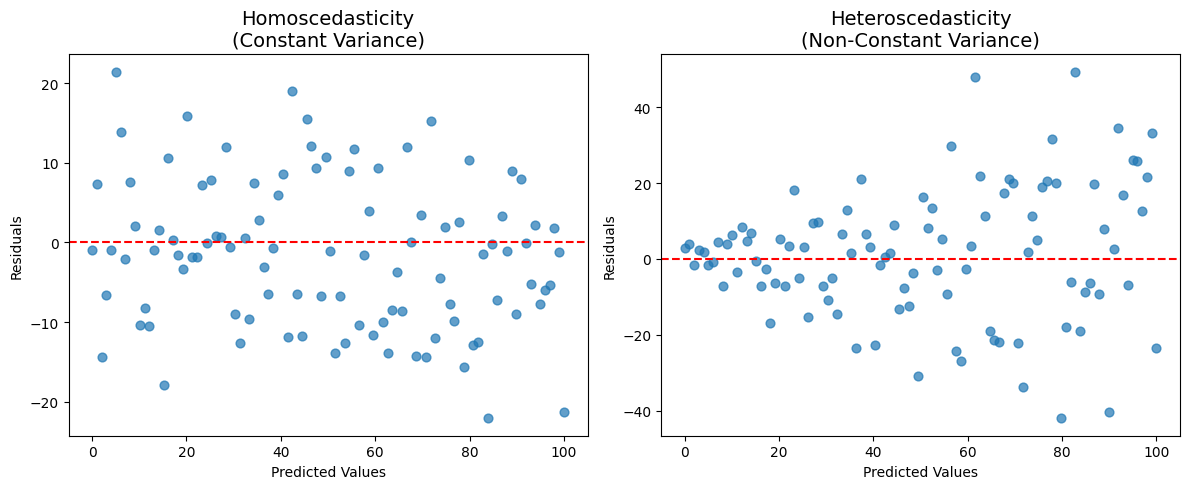

In [38]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2025)

n = 100

# Generate Predicted Values (X-axis for standard residual plot)
predicted_values = np.linspace(0, 100, n)

# 1. Homoscedasticity
# Residuals (Y-axis) have constant variance (spread is the same everywhere)
residuals_homo = np.random.normal(loc=0, scale=10, size=n)

# 2. Heteroscedasticity
# Residuals (Y-axis) variance increases with Predicted Value (spread gets wider)
residuals_hetero = np.random.normal(loc=0, scale=predicted_values * 0.3 + 2, size=n)

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Homoscedasticity
# Standard: X = Predicted, Y = Residuals
axs[0].scatter(predicted_values, residuals_homo, alpha=0.7, s=40)
axs[0].axhline(0, color='red', linestyle='--', linewidth=1.5) # Zero line for reference
axs[0].set_title("Homoscedasticity\n(Constant Variance)", fontsize=14)
axs[0].set_xlabel("Predicted Values")
axs[0].set_ylabel("Residuals")

# Plot 2: Heteroscedasticity
# Standard: X = Predicted, Y = Residuals
axs[1].scatter(predicted_values, residuals_hetero, alpha=0.7, s=40)
axs[1].axhline(0, color='red', linestyle='--', linewidth=1.5) # Zero line for reference
axs[1].set_title("Heteroscedasticity\n(Non-Constant Variance)", fontsize=14)
axs[1].set_xlabel("Predicted Values")
axs[1].set_ylabel("Residuals")

plt.tight_layout()
plt.show()

#### **Normality:**

Normality: The residuals should follow a normal distribution.  
**Q-Q Plot:** 

- Create a Q-Q plot of the residuals against a theoretical normal distribution.   
- If the points fall close to a straight line, normality is likely met.   

**Statistical Tests:**   
- Use the Shapiro-Wilk test or the Kolmogorov-Smirnov test to formally test for normality.


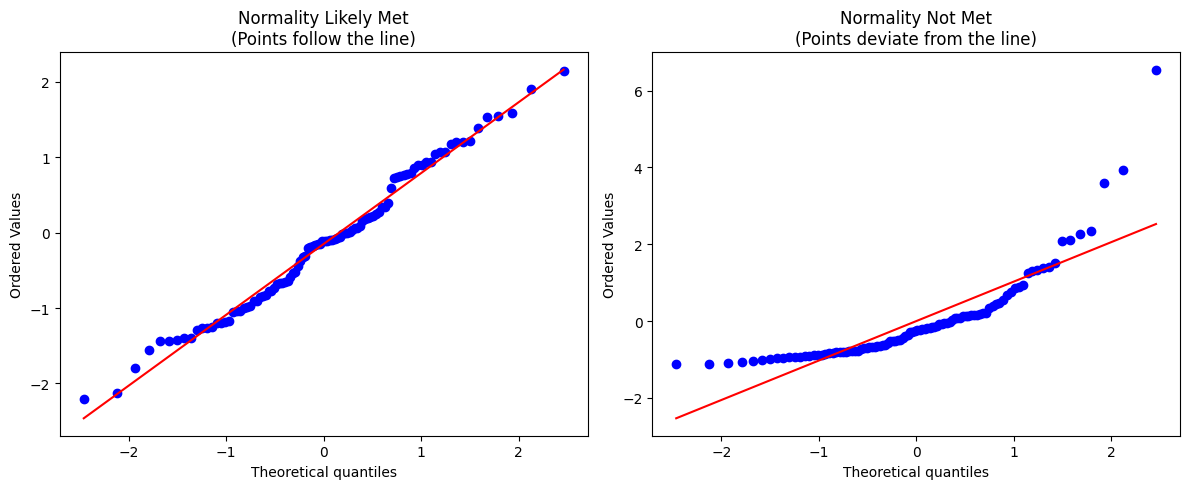

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

np.random.seed(2025)

n = 100

# 1. Normality met: Data generated from a normal distribution
data_normal = np.random.normal(loc=0, scale=1, size=n)

# 2. Normality not met: Data generated from a skewed distribution (e.g., Exponential)
# This creates a "curved" shape in the Q-Q plot
data_non_normal = np.random.exponential(scale=1, size=n)
# Center the residuals around 0
data_non_normal = data_non_normal - np.mean(data_non_normal)

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Normality Met
# stats.probplot automatically calculates the theoretical quantiles and plots them
# dist="norm" specifies we are comparing against a normal distribution
stats.probplot(data_normal, dist="norm", plot=axs[0])
axs[0].set_title("Normality Likely Met\n(Points follow the line)")

# Plot 2: Normality Not Met
stats.probplot(data_non_normal, dist="norm", plot=axs[1])
axs[1].set_title("Normality Not Met\n(Points deviate from the line)")

plt.tight_layout()
plt.show()

#### **No Multicollinearity:**

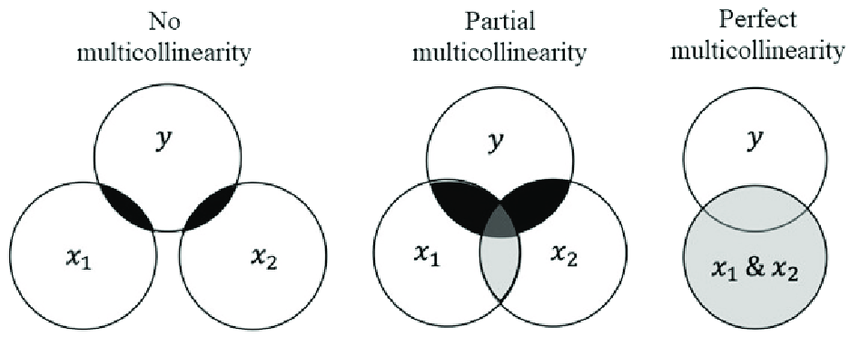

No Multicollinearity: The independent variables (features) should not be highly correlated with each other.  

**Correlation Matrix:** 

- Calculate the correlation matrix between the independent variables. If there are high correlations, multicollinearity may be present.   
- Can be checked with heat maps.   

**Variance Inflation Factor (VIF):**   
- Calculate the VIF for each independent variable. A VIF greater than 5 or 10 is often considered indicative of multicollinearity.

Looking at Correlation can inform how you select features. 

- High correlation \= likely to be impacting things\! 

# Title

Linear Regression Models are great for **inference**, but not for predictions. 

- Many times the assumptions are a little off  
- However, it is good to learn about positive/negative trends. 

# Multiple Linear regression 

When we have multiple features or *x* values that our *y* is dependant on, we can expand into **multiple linear regression.**

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.


## Okay. So lets actually try to make some models

The [palmerpenguins](https://allisonhorst.github.io/palmerpenguins/articles/intro.html) data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

![chinstrap, gentoo, and adelie penguins](lter_penguins.png)

The Palmer Archipelago penguins. Artwork by @allison_horst.

These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The data were imported directly from the Environmental Data Initiative (EDI) Data Portal, and are available for use by CC0 license (“No Rights Reserved”) in accordance with the Palmer Station Data Policy.

In [40]:
import pandas as pd
import seaborn as sns


In [41]:
penguins = pd.read_csv(r"Data\penguins.csv")


# Examine first 5 rows of dataset
penguins.head()

,rownames,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [42]:
# minor clean 

penguins = penguins.dropna()

### Identifying Features and Target

Since our focus is on simple linear regression; we are looking for any linear relationships among the variables. 


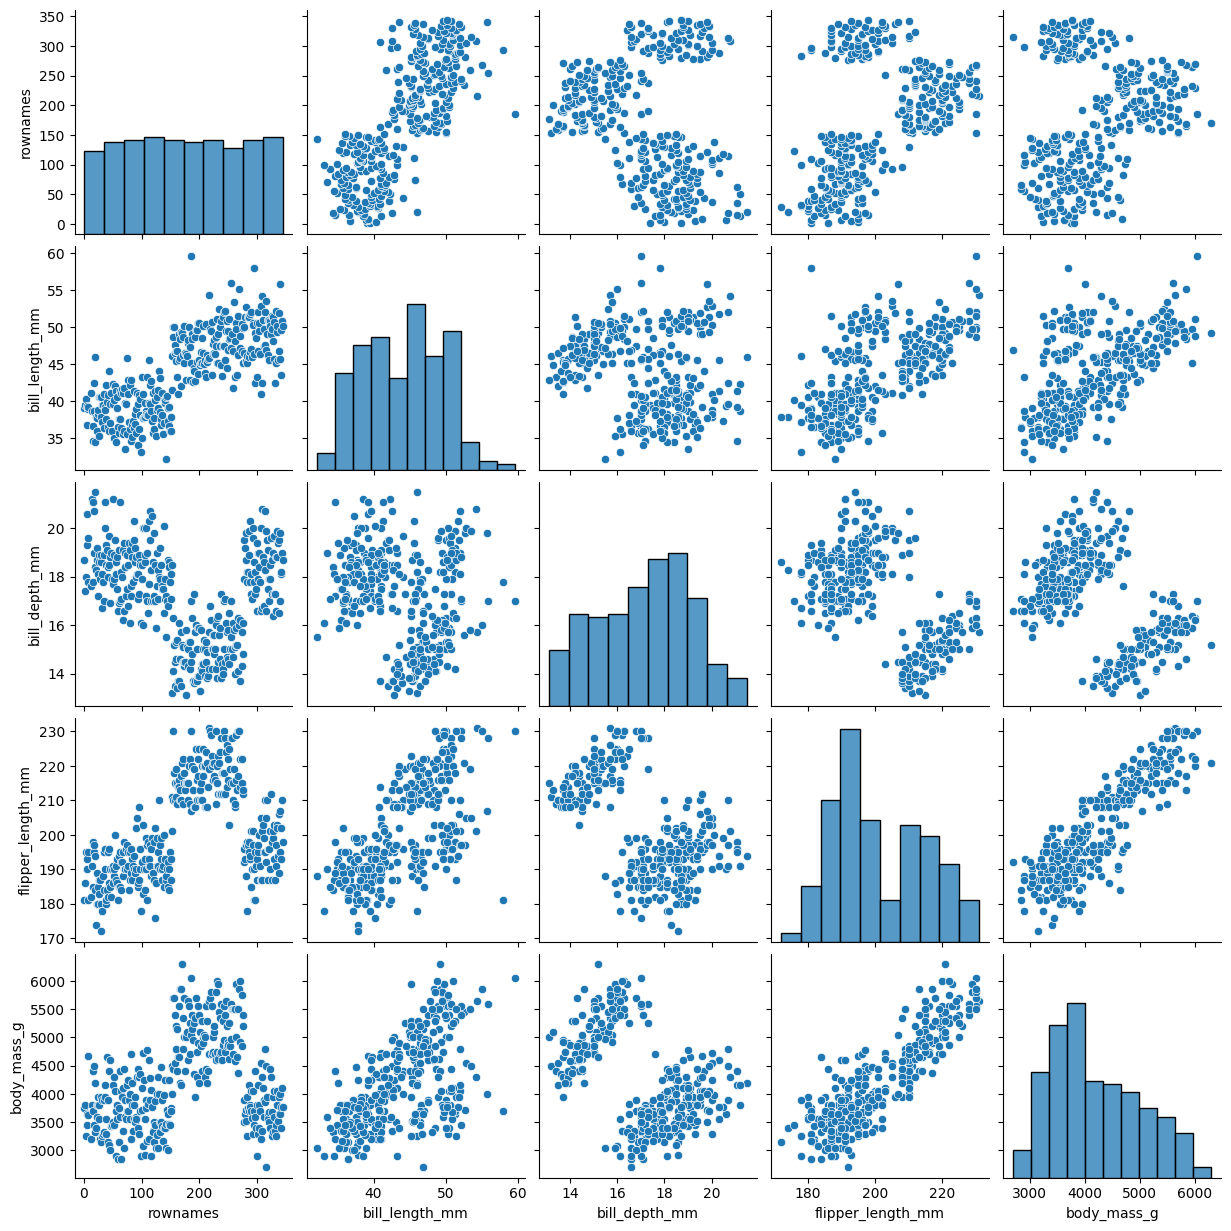

In [43]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins)

From the scatterplot matrix above, we can observe a few linear relationships:

- bill length (mm) and flipper length (mm)
- bill length (mm) and body mass (g)
- flipper length (mm) and body mass (g)

We could run a simple linear regression on any of them, but we will focus on the relationship between flipper length (mm) and body mass (g), as it appears the strongest. 

In [50]:
X = penguins[['flipper_length_mm']] # Example features
y = penguins[['body_mass_g']]    # Example target

### Performing Train-Test Split

We are going to be using `train_test_split` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

Then create variables `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split` with `X`, `y`, and `random_state=2025`.

In [51]:
from sklearn.model_selection import train_test_split

# Create train and test data using random_state=2026
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=None,
                                                    random_state=2025
)

## 2. Build and Evaluate a First Simple Model

We'll use a `LinearRegression` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)).


In [52]:
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model
model = LinearRegression()

Only use the training data to train the model

In [53]:
model.fit(X_train, y_train)

LinearRegression()

Then, evaluate the model using root mean squared error (RMSE). To do this, first import the `mean_squared_error` function from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [ ]:
from sklearn.metrics import root_mean_squared_error

# Generate predictions using baseline_model and X_train
y_pred_baseline = model.predict(X_train)

# Evaluate using root_mean_squared_error
baseline_rmse = root_mean_squared_error(y_train, y_pred_baseline)
baseline_rmse

397.0511312626882

An RMSE of 400 means that, on average, the model's predictions for a penguin's body mass is wrong by about 400 grams.

But what about on *unseen* data?

### Using the test data

In [63]:
# Make predictions on BOTH sets
y_pred_train = model.predict(X_train) # How well did it learn?
y_pred_test = model.predict(X_test)   # How well does it generalize?

# Calculate RMSE for both
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

print(f"Training RMSE: {rmse_train:.2f}")
print(f"Test RMSE:     {rmse_test:.2f}")

Training RMSE: 397.05
Test RMSE:     379.33


### Analysis of Baseline Model

The results are an RMSE of about 400 for both the training data and the test data. 

As RMSE is a form of *error*, so this means the performance is somewhat better on the test data than the training data. This is unusual! 

There are three main categories for how effective a model is:

**Good Model**	Train RMSE ≈ Test RMSE	The model learned the pattern well and predicts new data with similar accuracy. (e.g., Train=390, Test=410)

**Overfitting**	Train RMSE << Test RMSE	The model memorized the training data but fails on new data. It is too complex. (e.g., Train=200, Test=600)

**Underfitting**	Both are High	The model is too simple to capture the relationship (e.g., trying to fit a line to a curved relationship).

# What if we don't have enough data for a train-test split?

In the cell below, import cross_val_score ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)) and call it with our fitted model. 

For specific implementation reasons within the scikit-learn library, you'll need to use scoring="neg_root_mean_squared_error", which returns the RMSE values with their signs flipped to negative. Then we take the average and negate it at the end, so the number is directly comparable to the RMSE number above.

In [64]:
from sklearn.model_selection import cross_val_score

# Get the cross validated scores for our baseline model - using all data!
baseline_cv = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

# Display the average of the cross-validated scores
baseline_cv_rmse = -(baseline_cv.mean())
baseline_cv_rmse

np.float64(411.42303573988175)

This is worse! However, it is still close to our training and test data, so we can assume our model is a "good fit"

# Are our assumptions met? 

Let's go back to the start: does our data meet all the assumptions we made for linear regression? 

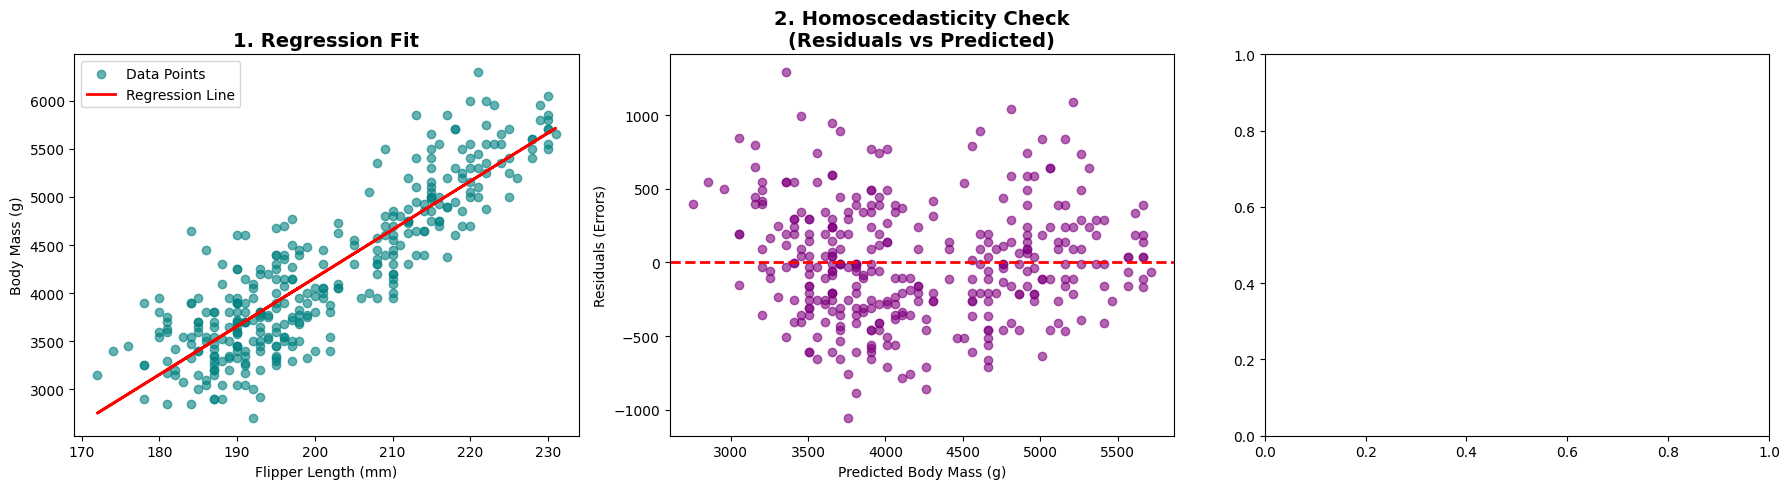

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Fit the model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# Create the figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: The Regression Line (Visualizing the Linear Relationship)
axs[0].scatter(X, y, alpha=0.6, color='teal', label='Data Points')
axs[0].plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
axs[0].set_title("1. Regression Fit", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Flipper Length (mm)")
axs[0].set_ylabel("Body Mass (g)")
axs[0].legend()

# Plot 2: Homoscedasticity (Residuals vs. Predicted)
axs[1].scatter(y_pred, residuals, alpha=0.6, color='purple')
axs[1].axhline(0, color='red', linestyle='--', linewidth=2)
axs[1].set_title("2. Homoscedasticity Check\n(Residuals vs Predicted)", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Predicted Body Mass (g)")
axs[1].set_ylabel("Residuals (Errors)")

# --- Plot 3: Normality (Q-Q Plot) ---
# OUT OF TIME ADD LATER

plt.tight_layout()

# Now choose a new subset of features to compare, or compare birds within a specific subgroup!

Our pairplot sometimes showed distinct groupings. Through filtering the penguins dataset down, can you find a linear relationship with a smaller RMSE? 

In [60]:
penguins.head()

,rownames,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## Filter to a subset of penguins

In [ ]:
# penguins = 

In [62]:
# examine the correlations between your chosen subgroup
# sns.pairplot(penguins)

## Linear Regression 

In [ ]:
# add your code here

# results